# **Hipergeométrica multivariante** $\mathbf X\sim\mathrm{MH}(N;K_1,\dots,K_m;n)$

Definición.
Población finita de tamaño $N$ particionada en $m$ clases con conteos $(K_1,\dots,K_m)$, $\sum_i K_i=N$. Se extrae una muestra **sin reemplazo** de tamaño $n$. El vector de conteos

$$
\mathbf X=(X_1,\dots,X_m)\sim \mathrm{MH}(N;K_1,\dots,K_m;n)
$$

con soporte $\{\,\mathbf x\in\mathbb Z_{\ge0}^m:\ \sum_i x_i=n,\ 0\le x_i\le K_i\,\}$.

PMF.

$$
\mathbb P(\mathbf X=\mathbf x)=\frac{\prod_{i=1}^{m}\binom{K_i}{x_i}}{\binom{N}{n}}.
$$

Momentos. Con $f_i:=K_i/N$ y $\mathrm{fpc}:=\frac{N-n}{N-1}$ (corrección por población finita):

$$
\mathbb E[X_i]=n f_i,\qquad
\mathrm{Var}(X_i)=n f_i(1-f_i)\,\mathrm{fpc},
$$

$$
\mathrm{Cov}(X_i,X_j)=-n f_i f_j\,\mathrm{fpc}\quad(i\ne j),
$$

$$
\mathrm{Corr}(X_i,X_j)= -\sqrt{\frac{f_i f_j}{(1-f_i)(1-f_j)}}\quad(i\ne j).
$$

Estructura.

* **Marginales**: $X_i\sim \mathrm{Hiper}(N,K_i,n)$.
* **Agregaciones**: Para $A\subset\{1,\dots,m\}$, $X_A:=\sum_{i\in A}X_i\sim \mathrm{Hiper}\big(N,\sum_{i\in A}K_i,n\big)$.
* **Condicionales**: Fijado $s=\sum_{i\in A}X_i$, el vector $(X_i)_{i\in A}\mid X_A=s$ es $\mathrm{MH}\big(\sum_{i\in A}K_i;\ (K_i)_{i\in A};\ s\big)$.
* **Intercambiabilidad**: el orden de extracción no importa; solo los conteos.
* **Límites**: si $n/N\to 0$ con $f_i$ fijos, $\mathbf X\Rightarrow \mathrm{Mult}\big(n;\mathbf p=f\big)$. Para $n$ moderado, $\mathbf X$ $\approx$ Normal multivariante con media y covarianza anteriores.

Factorización secuencial útil (muestreo):

$$
X_1\sim \mathrm{Hiper}(N,K_1,n),\quad
X_2\mid X_1\sim \mathrm{Hiper}(N-K_1,\ K_2,\ n-X_1),
$$

y continuar hasta $X_{m-1}$; luego $X_m=n-\sum_{i<m}X_i$.

Casos borde.

* $n=0\Rightarrow \mathbf X=\mathbf 0$.
* $n=N\Rightarrow \mathbf X=\mathbf K$.
* Si algún $K_i=0$ o $K_i<N$ trivializa la coordenada $i$.

Decisión de modelo.

* Sin reemplazo y fracción de muestreo no despreciable $(n/N\gtrsim 0.1)$: **MH**.
* Con reemplazo o población efectiva “infinita” $(n/N\to 0)$: **multinomial** con $p_i\approx K_i/N$.

Ejemplo numérico.
Baraja: $N=52$, $(K_\heartsuit,K_\spadesuit,K_\diamondsuit,K_\clubsuit)=(13,13,13,13)$, $n=5$.
Para $\mathbf x=(2,1,1,1)$:

$$
\mathbb P(\mathbf X=\mathbf x)=\frac{\binom{13}{2}\binom{13}{1}^3}{\binom{52}{5}}.
$$

Momentos por palo: $\mathbb E[X_i]=5\cdot 13/52=1.25$,
$\mathrm{Var}(X_i)=5\cdot\frac{13}{52}\cdot\frac{39}{52}\cdot\frac{47}{51}$,
$\mathrm{Cov}(X_i,X_j)=-5\cdot\frac{13}{52}\cdot\frac{13}{52}\cdot\frac{47}{51}$.

Inferencia práctica.
$\hat f_i:=X_i/n$ es insesgado para $f_i=K_i/N$.
$\mathrm{Var}(\hat f_i)=\frac{f_i(1-f_i)}{n}\,\mathrm{fpc}$.
Intervalos normales: $\hat f_i\pm z_{\alpha/2}\sqrt{\frac{\hat f_i(1-\hat f_i)}{n}\,\mathrm{fpc}}$.

Algoritmo de simulación simple.

1. Construye una lista con $K_1$ “1”, …, $K_m$ “m”.
2. Baraja y toma las primeras $n$.
3. Cuenta frecuencias.
   Equivalente y más eficiente: usa la factorización secuencial de hipergeométricas.

Uso típico.
Muestreo de lotes con clases múltiples, manos de cartas por palo, auditorías por tipo de defecto, biología con categorías discretas y recursos limitados.


## Ejemplo de la distribución hipergeométrica multivariante

Supongamos que tenemos una urna con bolas de 3 colores:
- 10 bolas rojas
- 15 bolas verdes
- 20 bolas azules

Extraemos 12 bolas sin reemplazo. ¿Cuál es la probabilidad de obtener 3 rojas, 4 verdes y 5 azules? ¿Cómo se ve la distribución de probabilidades para diferentes combinaciones?

A continuación se muestra un ejemplo en Python con visualización.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_hypergeom

sns.set(style="whitegrid")

# Parámetros del ejemplo
colores = ['Rojas', 'Verdes', 'Azules']
bolas = [10, 15, 20]  # cantidad de bolas de cada color
n = 12  # bolas extraídas

In [44]:
from IPython.display import display, Latex

expected_value = np.array(bolas) / sum(bolas) * n
for i in range(len(expected_value)):
    display(Latex(f"$\\mathbb{{E}}[X_{i}]$: {expected_value[i]}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [45]:
from collections import Counter

# Crear la urna con bolas de cada color según sus cantidades
urna = ['Rojas'] * bolas[0] + ['Verdes'] * bolas[1] + ['Azules'] * bolas[2]

# Realizar el experimento: extraer n bolas sin reemplazo
muestra = np.random.choice(urna, size=n, replace=False)

# Contar el número de bolas de cada color
conteo = Counter(muestra)

print("Ejemplo de un experimento de extracción:")
print("Bolas extraídas:", muestra)
print("Conteo de colores:", conteo)

Ejemplo de un experimento de extracción:
Bolas extraídas: ['Azules' 'Rojas' 'Verdes' 'Verdes' 'Rojas' 'Rojas' 'Azules' 'Verdes'
 'Azules' 'Rojas' 'Azules' 'Rojas']
Conteo de colores: Counter({'Rojas': 5, 'Azules': 4, 'Verdes': 3})


In [ ]:
# Probabilidad de obtener 3 rojas, 4 verdes y 5 azules
deseado = [3, 4, 5]
p = multivariate_hypergeom.pmf(deseado, bolas, n)
print(f"Probabilidad de obtener {deseado}: {p:.5f}")

Probabilidad de obtener [3, 4, 5]: 0.08830


In [56]:
import math
# Esta probabilidad se calcula a mano asi Prod Ki C xi / N C n

# Generar todas las combinaciones posibles de extracciones
# Las combinaciones se calculan como nCr = n! / (n-r)! * r!
K1 = bolas[0]
K2 = bolas[1]
K3 = bolas[2]

x1 = deseado[0]
x2 = deseado[1]
x3 = deseado[2]

maneras_de_tener_rojas = math.factorial(K1) / (math.factorial(K1 - x1) * math.factorial(x1))
maneras_de_tener_verdes = math.factorial(K2) / (math.factorial(K2 - x2) * math.factorial(x2))
maneras_de_tener_azules = math.factorial(K3) / (math.factorial(K3 - x3) * math.factorial(x3))
print(maneras_de_tener_rojas, maneras_de_tener_verdes, maneras_de_tener_azules)

N = sum(bolas)
maneras_de_tener_n_bolas_en_N = math.factorial(N) / (math.factorial(N - n) * math.factorial(n))
print(maneras_de_tener_n_bolas_en_N)

probabilidad = (maneras_de_tener_rojas * maneras_de_tener_verdes * maneras_de_tener_azules) / maneras_de_tener_n_bolas_en_N
print(f"Probabilidad calculada a mano: {probabilidad:.5f}")

120.0 1365.0 15504.0
28760021745.0
Probabilidad calculada a mano: 0.08830


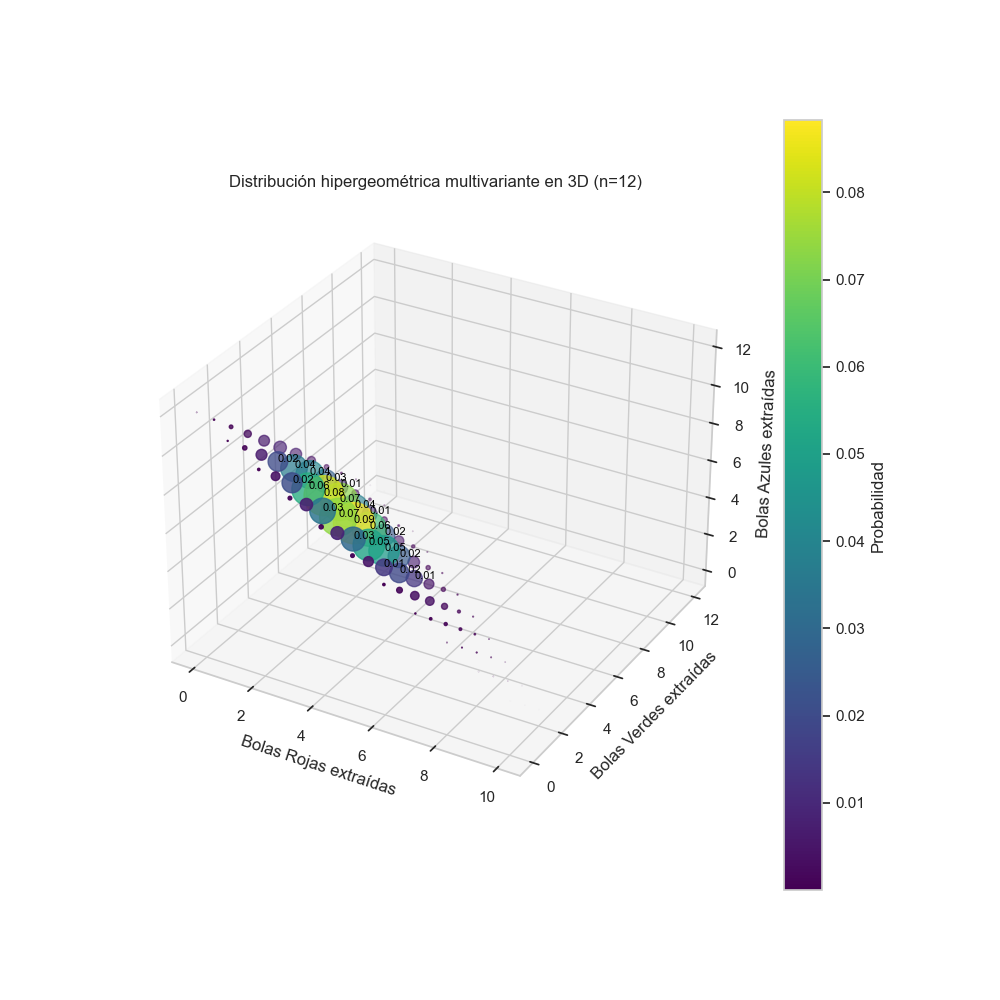

In [ ]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D  # Ensure 3D capabilities

# Graficar la distribución para diferentes combinaciones
resultados = []
for r in range(0, min(bolas[0], n)+1):
    for v in range(0, min(bolas[1], n-r)+1):
        a = n - r - v
        if 0 <= a <= bolas[2]:
            prob = multivariate_hypergeom.pmf([r, v, a], bolas, n)
            resultados.append((r, v, a, prob))

resultados = np.array(resultados)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with x: rojas, y: verdes, z: azules extraídas; color indicates probabilidad
sc = ax.scatter(resultados[:,0], resultados[:,1], resultados[:,2],
                c=resultados[:,3], cmap='viridis', s=10000*resultados[:,3])
fig.colorbar(sc, ax=ax, label='Probabilidad')

ax.set_xlabel('Bolas Rojas extraídas')
ax.set_ylabel('Bolas Verdes extraídas')
ax.set_zlabel('Bolas Azules extraídas')
ax.set_title('Distribución hipergeométrica multivariante en 3D (n=12)')

# Añadir anotaciones para puntos con probabilidad > 0.01 (opcional)
for r, v, a, prob in resultados:
    if prob > 0.01:
        ax.text(r, v, a, f'{prob:.2f}', color='black', fontsize=8)

plt.show()